### 1. Business Understanding

The dataset in use has been provided by supermarket company detailing their sales activities. The task is to find some insights that can help them improve their sales and marketing strategies.

These questions were proposed:

* **At what quantities does the gender-specific customers generate more gross income?**
* **Which product-line has more demand amongst the productlines considered?**
* **How does the payment method affect gender-specific customer satisfaction?**
* **What product lines have more gross income on certain days of the week?**
* **Which city is the good choice for opening up a new store and expand business?**
* **Which branch possess more gross income?**
* **Who contribute more to the gross income? Male customers or female customers?**
* **Does customer type affect the sales?**
* **What is the general trend of the gross income?**
* **Is there a relationship between Unit Price and Quantity?**

**IMPORTING NECESSARY PACKAGES AND DATASETS**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('dark_background')

import sklearn as sk
from sklearn.model_selection import train_test_split
print('All packages included successfully!')

All packages included successfully!


In [4]:
from google.colab import files
#uploaded = files.upload()

Saving supermarket_sales - Sheet1.csv to supermarket_sales - Sheet1.csv


In [32]:
salesdf =pd.read_csv('C:\\Users\\madhu\\Downloads\\supermarket_sales - Sheet1.csv')
salesdf.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### 2. Data exploration and insights collection

###### About the dataset: -

The growth of supermarkets is increasing  in number are and so is the  market competition. The dataset is one of the historical sales of supermarket company which has been recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

1. **Invoice id**: Computer-generated nvoice identification number.
2. **Branch**: Supercenter branch.
3. **City**: Supercenters location.
4. **Customer type**: Type of customers, members are member card holder and normal without member cards.
5. **Gender**: Gender type of customer.
6. **Product line**: General item categorization groups.
7. **Unit price**: Price of each product in U.S. Dollars.
8. **Quantity**: Number of products purchased by customer.
9. **Tax**: 5% tax fee on total amount.
10. **Total**: Total price including tax.
11. **Date**: Date of purchase.
12. **Time**: Purchase time.
13. **Payment**: Payment method used by customer for purchase.
14. **COGS**: Cost of goods sold.
15. **Gross margin percentage**: Gross margin percentage.
16. **Gross income**: Gross income.
17. **Rating**: Customer stratification rating for shopping experience (On a scale of 1 to 10)

In [19]:
print('(Rows, Columns):', salesdf.shape)

(Rows, Columns): (1000, 17)


In [20]:
salesdf.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [21]:
#To get the summary of the dataframe
count=salesdf.count()
info=pd.DataFrame(count,columns=['Count'])
info['Unique_values']= salesdf.nunique()
info['dtype']= salesdf.dtypes
info

,Count,Unique_values,dtype
Invoice ID,1000,1000,object
Branch,1000,3,object
City,1000,3,object
Customer type,1000,2,object
Gender,1000,2,object
Product line,1000,6,object
Unit price,1000,943,float64
Quantity,1000,10,int64
Tax 5%,1000,990,float64
Total,1000,990,float64


In [22]:
#Displaying the top 5 rows of the dataset
salesdf.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


The above dataframe shows that the data does not have any missing values and need no cleaning.So we move on to the Exploratory Data Analysis. 

In [23]:
# Basic statistical measures like percentile, mean, std etc. of the numerical variable dataset 
d = salesdf.describe().T
d

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [24]:
#renaming columns
salesdf.columns = ['invoice_id','branch','city','customer_type','gender', 'product_line','unit_price', 'quantity','tax_5%','total', 'date', 'time', 'payment','cogs','gross_margin%', 'gross_income', 'rating']

In [25]:
gross_income=salesdf['gross_income']
salesdf['date'] = pd.to_datetime(salesdf['date'])
salesdf['day'] = (salesdf['date']).dt.day
salesdf['month'] = (salesdf['date']).dt.month
salesdf['year'] = (salesdf['date']).dt.year
dates= salesdf.sort_values(by= 'date')

In [26]:
Time=salesdf.groupby(['day', 'month', 'branch'])['gross_income'].sum().reset_index()
Time['People/day']= salesdf.groupby(['day', 'month', 'branch'])['gross_income'].count().reset_index().gross_income
Time.head(5)

,day,month,branch,gross_income,People/day
0,1,1,A,112.9200,5
1,1,1,B,73.1760,3
2,1,1,C,39.8650,4
3,1,2,A,43.4255,3
4,1,2,C,72.9810,3


In [27]:
Time['quantity']=salesdf.groupby(['day', 'month', 'branch'])['quantity'].sum().reset_index().quantity
time=pd.DataFrame(Time.corr()['gross_income'])
time

,gross_income
day,-0.024553
month,-0.025251
gross_income,1.000000
People/day,0.830119
quantity,0.913680


* From the table obtained, it is evident that the 'Quantity' purchased by the customers and 'People/day' visited have a strong relationship with the 'Gross income'. 
 
* This further explains the decline(drops) in the time graph obtained of the 'Gross income' ,i.e. decrease in 'People/day' visiting the market and the 'Quantity' bought by the customers may result in the drops in the line plot obtained (in Question 8 of Data Visualiztion).



INSIGHTS

In [28]:
print("1. Mean ratings of an experience in the supermaket =",d.iloc[-1,1])
print("2. Mean unit price of an article in the supermaket = $",d.iloc[0,1])
print("3. Mean cogs obtained from selling the articles    = $",d.iloc[4,1])
print("4. Mean gross margin percentage of articles sold   = $",d.iloc[5,1])
print("5. So mean revenue in dollars of the supermarket   = $",(d.iloc[4,1]/(d.iloc[5,1]-1))+d.iloc[4,1])
print("6. Net mean income per day of the supermarket      = $",((d.iloc[4,1]/(d.iloc[5,1]-1))+d.iloc[4,1])/40)

1. Mean ratings of an experience in the supermaket = 6.972700000000003
2. Mean unit price of an article in the supermaket = $ 55.67212999999998
3. Mean cogs obtained from selling the articles    = $ 307.58738000000034
4. Mean gross margin percentage of articles sold   = $ 4.761904762000062
5. So mean revenue in dollars of the supermarket   = $ 389.35111392197973
6. Net mean income per day of the supermarket      = $ 9.733777848049494


### 3. Data visualization

In [33]:
#renaming columns
salesdf.columns = ['invoice_id','branch','city','customer_type','gender', 'product_line','unit_price', 'quantity','tax_5%','total', 'date', 'time', 'payment','cogs','gross_margin%', 'gross_income', 'rating']

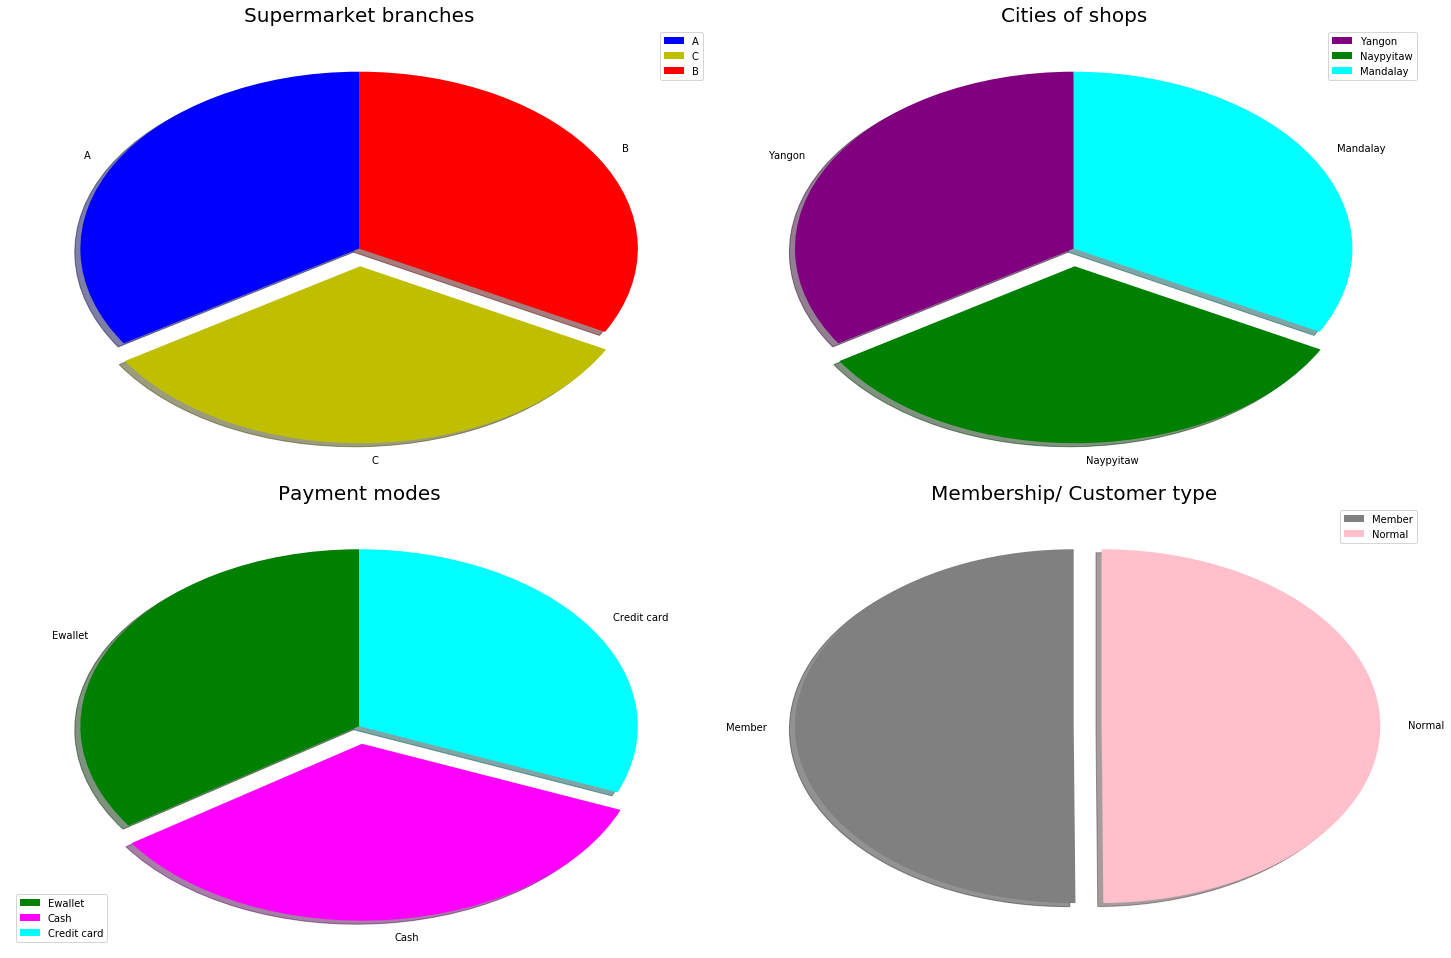

In [34]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
x = salesdf['branch'].value_counts()
y = salesdf['branch'].unique()
c = ['b','y','r']
plt.pie(x,labels=y,colors=c,startangle=90,shadow=True,explode=(0,0.1,0))
plt.legend(loc=1)
plt.title("Supermarket branches",fontsize='20')

plt.subplot(3,2,2)
x = salesdf['city'].value_counts()
y = salesdf['city'].unique()
c = ['purple','green','cyan']
plt.pie(x,labels=y,colors=c,startangle=90,shadow=True,explode=(0,0.1,0))
plt.legend(loc=1)
plt.title("Cities of shops",fontsize='20')

plt.subplot(3,2,3)
x = salesdf['payment'].value_counts()
y = salesdf['payment'].unique()
c = ['green','magenta','cyan']
plt.pie(x,labels=y,colors=c,startangle=90,shadow=True,explode=(0,0.1,0))
plt.legend(loc=0)
plt.title("Payment modes",fontsize='20')


plt.subplot(3,2,4)
x = salesdf['customer_type'].value_counts()
y = salesdf['customer_type'].unique()
c = ['grey','pink']
plt.pie(x,labels=y,colors=c,startangle=90,shadow=True,explode=(0,0.1))
plt.legend(loc=1)
plt.title("Membership/ Customer type",fontsize='20')
plt.tight_layout()

**1. At what quantities does the gender-specific customers generate more gross income?**

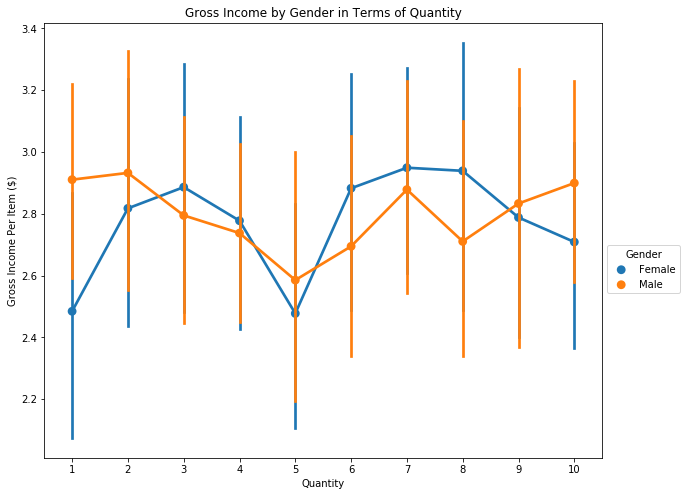

In [35]:
fig = plt.figure(figsize=(10,8))
ax = sns.pointplot(y=(salesdf.gross_income/salesdf.quantity), x=salesdf.quantity, hue=salesdf.gender)
labels=['Gross Income by Gender in Terms of Quantity', 'Gross Income Per Item ($)', 'Quantity', 'Gender']
fig = plt.title(labels[0])
ax.set_ylabel(labels[1])
ax.set_xlabel(labels[2])
fig = plt.legend(title=labels[3], loc='upper left', bbox_to_anchor=(1.0, 0.5), ncol=1) #Position of legend box 

* The above obtained graph shows that male customers generate more gross income per item when buying items at lower quantity, which is most clearly evident at the quantity of 1. 
* The female customers, on the other hand, tend to generate more gross income per item when buying at higher quantities.

**2. Which productline has more demand amongst the productlines considered?**

([<matplotlib.patches.Wedge at 0x22663c5b160>,
 [Text(0.935685,0.578354,'Electronic accessories quantity'),
  Text(-0.0557949,1.09858,'Fashion accessories quantity'),
  Text(-0.984202,0.49127,'Food and beverages quantity'),
  Text(-0.928021,-0.590574,'Health and beauty quantity'),
  Text(0.00250877,-1.1,'Home and lifestyle quantity'),
  Text(0.952105,-0.550905,'Sports and travel quantity')],
 [Text(0.510374,0.315466,'17.6%'),
  Text(-0.0304336,0.599228,'16.4%'),
  Text(-0.536838,0.267965,'17.3%'),
  Text(-0.506193,-0.322131,'15.5%'),
  Text(0.00136842,-0.599998,'16.5%'),
  Text(0.51933,-0.300494,'16.7%')])

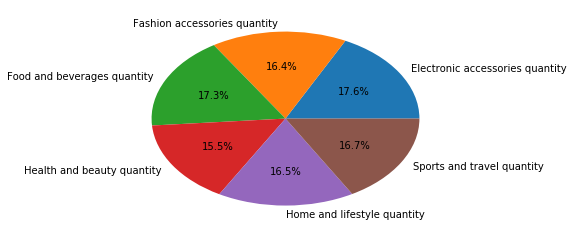

In [36]:
demand= salesdf.groupby('product_line')['quantity'].sum()
demand=pd.DataFrame(demand)
demand=demand.stack()            
fig, ax = plt.subplots()
ax.pie(demand, labels=["{0} {1}".format(x1, x2) for x1, x2 in demand.index], autopct='%1.1f%%')

**Demand variation in the three branches**

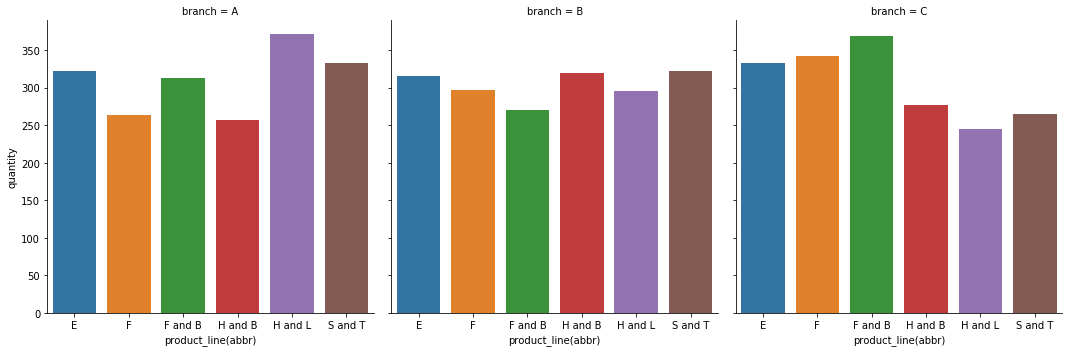

In [37]:
def abbrevation(product_line):
    if product_line == 'Health and beauty':
        return 'H and B'
    elif product_line == 'Electronic accessories':
        return 'E'
    elif product_line == 'Home and lifestyle':
        return 'H and L'
    elif product_line == 'Sports and travel':
        return 'S and T'
    elif product_line == 'Food and beverages':
        return 'F and B'
    elif product_line == 'Fashion accessories':
        return 'F'
salesdf['product_line(abbr)']= salesdf['product_line'].apply(abbrevation)

qdata1 = salesdf.groupby(['product_line(abbr)', 'branch'])['quantity'].sum().reset_index()
plt.figure(figsize=(12,8))
sns.catplot(x= 'product_line(abbr)', y= 'quantity', col = 'branch', kind = 'bar', data= qdata1 )
#data.filter(['product_line', 'product_line']).drop_duplicates().reset_index(drop = True)

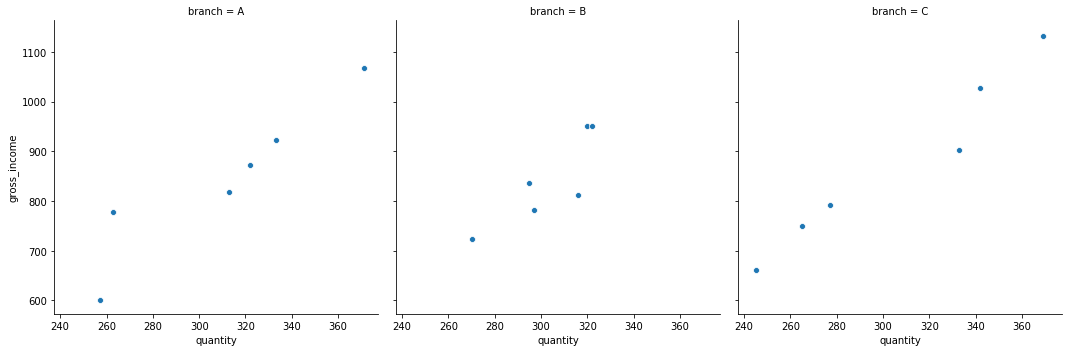

In [38]:
q_data= salesdf.groupby(['product_line(abbr)', 'branch'])['gross_income'].sum().reset_index()
q_data['quantity']=salesdf.groupby(['product_line(abbr)', 'branch'])['quantity'].sum().reset_index().quantity
sns.relplot(x= 'quantity', y= 'gross_income', col = 'branch', kind = 'scatter', data= q_data )

* The previous pie chart depicts that among the six productlines, 'Electronic accessories' has the highest demand. It can be also seen that all the six productlines have their overall demand within the same range.   

* However, when the demand is analyzed with respect to the three differnt branches Á', 'B'and 'C', it is found out that the general observation obtained from the pie chart does not make sense, as the demand of the 'Product Lines' differ according to the branches that they are sold.

* The highest demand in Branch 'A' is for 'Home and lifestyle', ín Branch 'B', it is 'Sports and travel' and 'Food and beverages' has the highest demand in Branch 'C'.

* The variation in the demand for the 'Product Lines' in the three Branches could be due to the difference in taste of customers residing in the vicinity of the respective Branches.

* The quantities purchased are grouped with respect to the product lines and further are plotted  which has the 'Product lines' having the high demand contributes most to the income for all the respective three branches. Furthermore, the strong linear relationship between the ' Quantity' and 'Gross Income' is highlighted in the scatter plot.

**3. How does the payment method affect gender-specific customer satisfaction?**

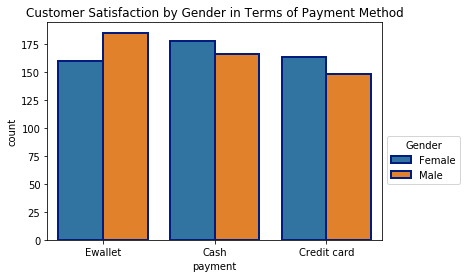

In [39]:
sns.countplot(x="payment",hue="gender",data=salesdf,linewidth=2,edgecolor=sns.color_palette("dark", 1))
plt.legend(bbox_to_anchor=(1,0.5))
labels=['Customer Satisfaction by Gender in Terms of Payment Method', 'Rating', 'Payment Method', 'Gender']
fig = plt.title(labels[0])
ax.set_ylabel(labels[1])
ax.set_xlabel(labels[2])
fig = plt.legend(title=labels[3], loc='upper left', bbox_to_anchor=(1.0, 0.5), ncol=1)

The above graph depicts that the male customers give higher ratings than the female customers when the payment method used is 'Ewallet' or 'Credit card', whereas when the payment is done through 'Cash', female customers rate higher than male customers.

**4. What product lines have more gross income on certain days of the week?**

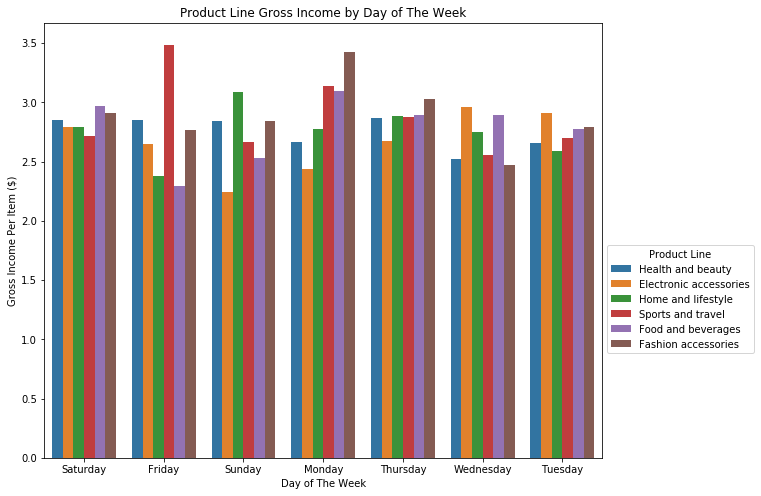

In [40]:
import datetime
fig = plt.figure(figsize=(10,8))
salesdf['date'] = pd.to_datetime(salesdf['date'])
ax = sns.barplot(y=(salesdf.gross_income/salesdf.quantity), x=salesdf.date.dt.weekday_name, hue=salesdf.product_line, ci=False)
labels=['Product Line Gross Income by Day of The Week', 'Gross Income Per Item ($)', 'Day of The Week', 'Product Line']
fig = plt.title(labels[0])
ax.set_ylabel(labels[1])
ax.set_xlabel(labels[2])
fig = plt.legend(title=labels[3], loc='upper left', bbox_to_anchor=(1.0, 0.5), ncol=1)

'Health and income' product line has more gross income when nearing the weekend- from Thursday to Sunday, 'Electronic accessories' on Wednesdays and Tuesdays,'Home and lifestyle' on Sundays,'Sports and Travel' on Fridays,'Food and beverages' on Mondays and ' fashion accessories items' has more gross income on Monday.


**5. Which city is the good choice for opening up a new store and expand business?**

In [41]:
import numpy as np
df_revenue_by_city = salesdf.groupby('city').agg([np.sum, np.median])
df_revenue_by_city[['gross_income']].T

city                 Mandalay   Naypyitaw     Yangon
gross_income sum     5057.032  5265.17650  5057.1605
             median    12.042    12.92475    11.4680

In [42]:
df_revenue_by_city[['gross_income', 'unit_price', 'quantity']]

gross_income           unit_price         quantity       
                   sum    median        sum  median      sum median
city                                                               
Mandalay     5057.0320  12.04200   18478.88  54.850     1820      5
Naypyitaw    5265.1765  12.92475   18567.76  56.810     1831      6
Yangon       5057.1605  11.46800   18625.49  53.235     1859      5

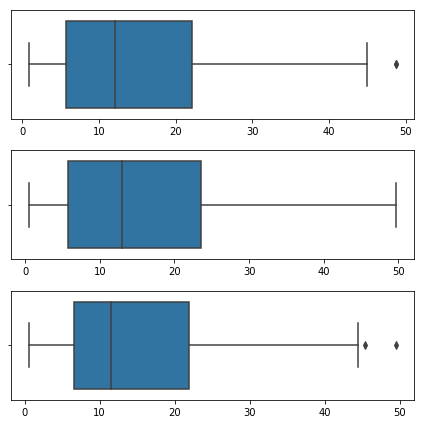

In [43]:
fig, axs = plt.subplots(3, figsize = (6,6))
Mandalay=salesdf[salesdf['city']=='Mandalay']
Mandalay=Mandalay[['gross_income']]
plt1 = sns.boxplot(Mandalay, ax = axs[0])

Naypyitaw=salesdf[salesdf['city']=='Naypyitaw']
Naypyitaw=Naypyitaw[['gross_income']]
plt2 = sns.boxplot(Naypyitaw, ax = axs[1])

Yangon=salesdf[salesdf['city']=='Yangon']
Yangon=Yangon[['gross_income']]
plt2 = sns.boxplot(Yangon, ax = axs[2])
plt.tight_layout()

* The middle box in the plots which represents 50% of the gross income values is more wide for the city 'Naypyitaw' indicating more revenue collection(Gross income) from the city 'Naypyitaw' than that of other cities.

* From the three boxplots, it can be said that the 'Gross Income' of the city 'Naypyitaw' has its median(mid-point) value higher than that of the other two cities. 

* Furthermore, the upper and lower Whiskers which represent Gross Income outside the middle 50%, tells that the data is not normally distributed and the distribution is right skewed. 

* It can be inferred that even though the number of customers in 'Naypyitaw' is less, they tend not only to spend more on each purchase, but also buy more in quantity. 

This makes 'Naypyitaw' , a good choice for business expansion.

**6.  Which branch has more gross income?**

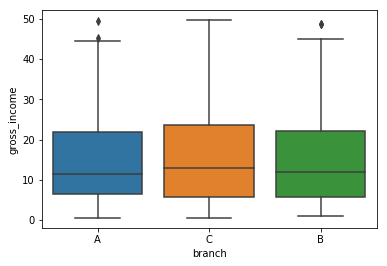

In [44]:
sns.boxplot(x=salesdf['branch'],y=salesdf['gross_income'])

* The middle box in the plots which represents 50% of the gross income values is more wide for the branch 'C' indicating more revenue collection(Gross income) from the branch 'C' than that of other branches.

* From the three boxplots, it can be said that the 'Gross Income' of the branch 'C' has its median(mid-point) value higher than that of the other two branches. 

* Furthermore, the upper and lower Whiskers which represent Gross Income outside the middle 50%, tells that the data is not normally distributed and the distribution is right skewed.  

Conclusion is that Branch C of the stores contributes the most to gross income of the supermarket.

**7. Who contribute more to the gross income? Male customers or female customers?**

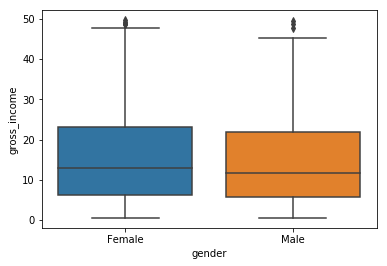

In [45]:
sns.boxplot(x=salesdf['gender'],y=salesdf['gross_income'])

* The boxlplot with 'Gender' on x-axis and 'Gross income' on y-axis depicts that the contribution to 'Gross Income' from the 'Female' customers has its median(mid-point) value higher than that of 'Male' customers. 

* It can be said that the revenue collection(Gross income) from the 'Female' customers is more than that of 'Male' customers.

Female customers seem to contribute more to the gross income of the market.

**8. What is the general trend of the gross income?**

In [46]:
gross_income=salesdf['gross_income']
salesdf['date'] = pd.to_datetime(salesdf['date'])
salesdf['day'] = (salesdf['date']).dt.day
salesdf['month'] = (salesdf['date']).dt.month
salesdf['year'] = (salesdf['date']).dt.year
dates= salesdf.sort_values(by= 'date')

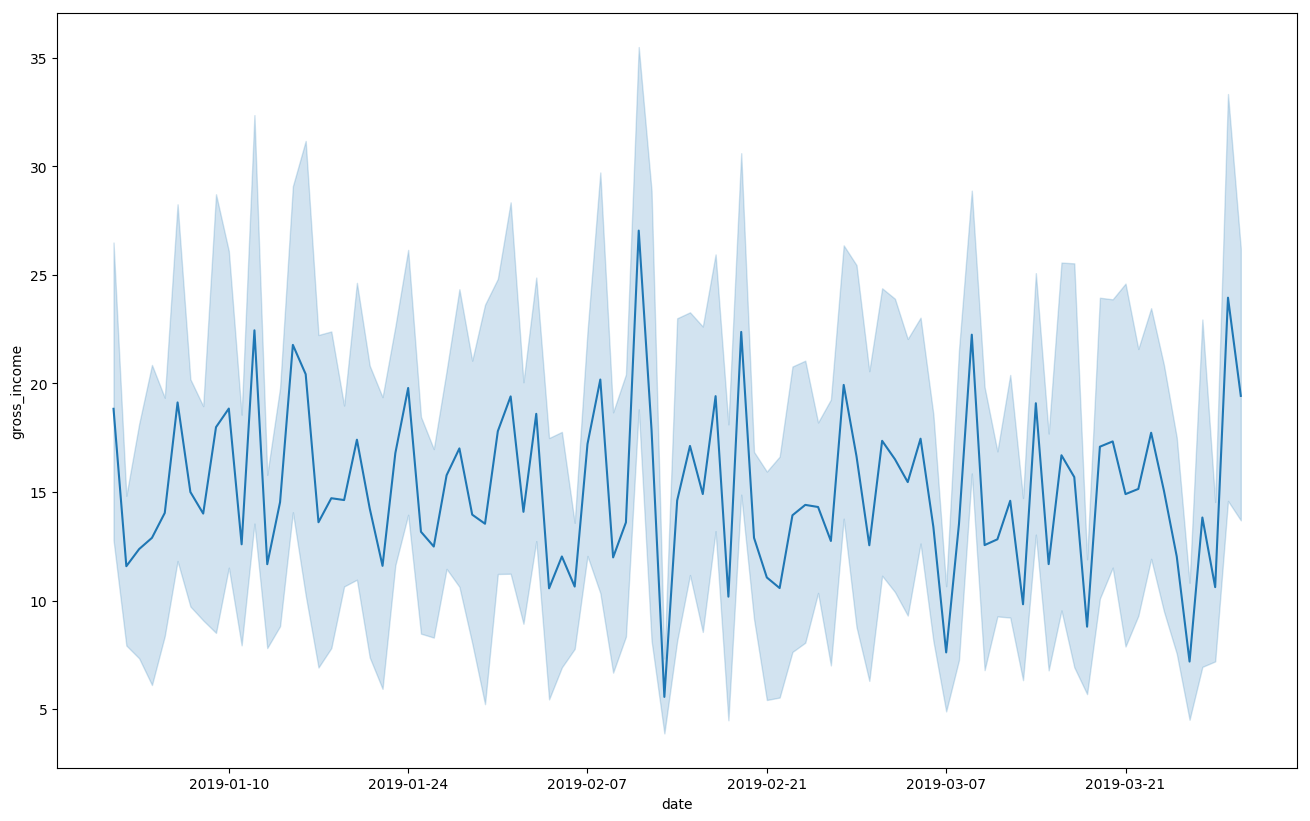

In [47]:
plt.figure(figsize=(16,10), facecolor= 'w', dpi=100)
sns.lineplot(x='date', y='gross_income', data=dates)

In [48]:
salesdf.groupby(['month']).agg({'gross_income': 'mean'})

,gross_income
month,
1,15.732125
2,15.278858
3,15.107730


Text(0.5,0,'Month')

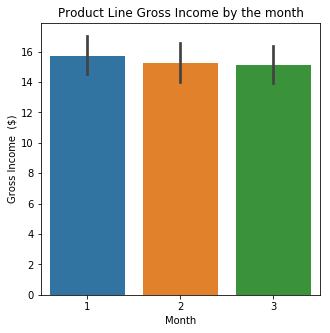

In [50]:
import datetime
#fig = plt.figure(figsize=(10,8))
fig_dims = (5,5)
fig, ax = plt.subplots(figsize=fig_dims)
salesdf['date'] = pd.to_datetime(salesdf['date'])
ax = sns.barplot(y=salesdf.gross_income, x=salesdf.date.dt.month)
labels=['Product Line Gross Income by the month', 'Gross Income  ($)', 'Month']
fig = plt.title(labels[0])
ax.set_ylabel(labels[1])
ax.set_xlabel(labels[2])

* From the lineplot, it can be said that the 'Gross Income' fluctuates throughout the month.
* Since there exists only three months in the dataset, it was feasible to group the 'Gross Income' by 'Month' and the observation is that there is decline in the 'Gross Income' as the months pass, which is evident from the bar graph obtained above.
* It can inferred that the general trend is  decrease in 'Gross income'. 

 **9. Is there a relationship between Unit Price and Quantity?**

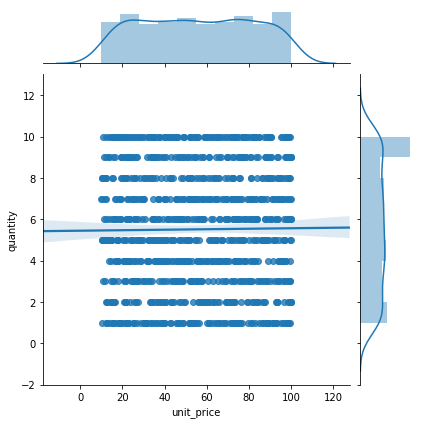

In [51]:
sns.jointplot(x="unit_price", y="quantity", data=salesdf, kind="reg")

From the jointplot obtained, it can clearly inferred that there exists no relationship between the 'Unit Price' and 'Quantity' purchased.

**10. Does customer type affect the sales?**

In [52]:
salesdf.groupby(['customer_type']).agg({'gross_income': 'sum'})

,gross_income
customer_type,
Member,7820.164
Normal,7559.205


Text(0.5,0,'Customer type')

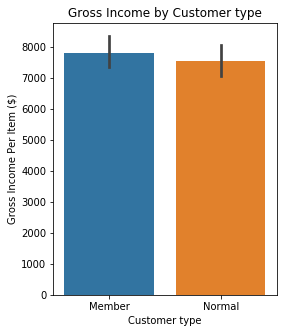

In [53]:
fig_dims = (4,5)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.barplot(x="customer_type", y="gross_income", estimator = sum, data=salesdf)
labels=['Gross Income by Customer type', 'Gross Income Per Item ($)', 'Customer type']
fig = plt.title(labels[0])
ax.set_ylabel(labels[1])
ax.set_xlabel(labels[2])

From the barplot, it is visible that the customers who have membership have contributed more to the Gross income than when compared to 'Normal' customers. However, the difference between the contribution is insignificant.

### 4. Model building

##### PREDICTION

In [71]:
salesdf =pd.read_csv('C:\\Users\\madhu\\Downloads\\supermarket_sales - Sheet1.csv')

In [72]:
#renaming columns
salesdf.columns = ['invoice_id','branch','city','customer_type','gender', 'product_line','unit_price', 'quantity','tax_5%','total', 'date', 'time', 'payment','cogs','gross_margin%', 'gross_income', 'rating']

**From the dataset, we consider the features which are numerical and omit the categorical variables for the modeling purpose. We further normalize the considered features in order to make the model less sensitive to the scale of the features.**

In [73]:
df = pd.DataFrame(salesdf, columns = ['total','gross_income','gross_margin%','unit_price'])
df.head(7)

,total,gross_income,gross_margin%,unit_price
0,548.9715,26.1415,4.761905,74.69
1,80.2200,3.8200,4.761905,15.28
2,340.5255,16.2155,4.761905,46.33
3,489.0480,23.2880,4.761905,58.22
4,634.3785,30.2085,4.761905,86.31
5,627.6165,29.8865,4.761905,85.39
6,433.6920,20.6520,4.761905,68.84


In [74]:
#Normalizing
sk.preprocessing.normalize(df, norm='l2', axis=0, copy=True, return_norm=False)

array([[0.04277541, 0.04277541, 0.03162278, 0.03831189],
       [0.00625068, 0.00625068, 0.03162278, 0.0078378 ],
       [0.02653347, 0.02653347, 0.03162278, 0.02376476],
       ...,
       [0.00260499, 0.00260499, 0.03162278, 0.01633218],
       [0.00538507, 0.00538507, 0.03162278, 0.03376206],
       [0.05059285, 0.05059285, 0.03162278, 0.04531359]])

**Correlation Heatmap**

'Gross Income' and 'Unit Price' are considered here as we are able to find a decent correlation between the two. 

We are not going for the ones with a correlation equal to one because it would be too obvious to make the predictions using them as even a slight change in one variable will reflect the change in the other one respectively.

Text(0.5,0.98,'Correlational Heatmap')

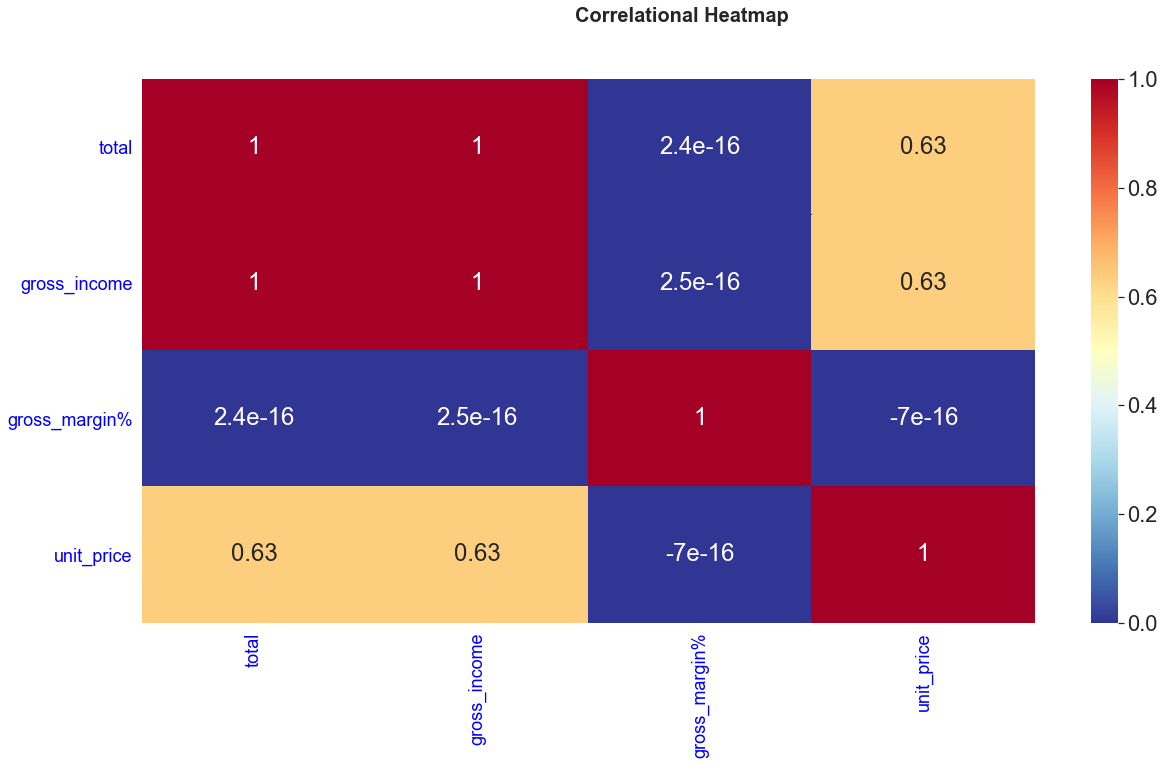

In [75]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.heatmap(df.corr(),cmap='RdYlBu_r',annot=True)
sns.set(font_scale=2)
plt.xticks(rotation=90,fontsize='18')
[i.set_color("blue") for i in plt.gca().get_xticklabels()]
plt.yticks(fontsize='18')
[i.set_color("blue") for i in plt.gca().get_yticklabels()]
plt.suptitle('Correlational Heatmap',fontsize='20',fontweight='bold')

In [76]:
#Selection of dependent and independent variables for modeling
x = df.iloc[:,3].values.reshape(-1,1) #Selecting the independent feature 'Unit Price' 
y = df.iloc[:,1].values #Dependent feature'Gross Income' 

In [88]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.48, random_state = 42)

# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

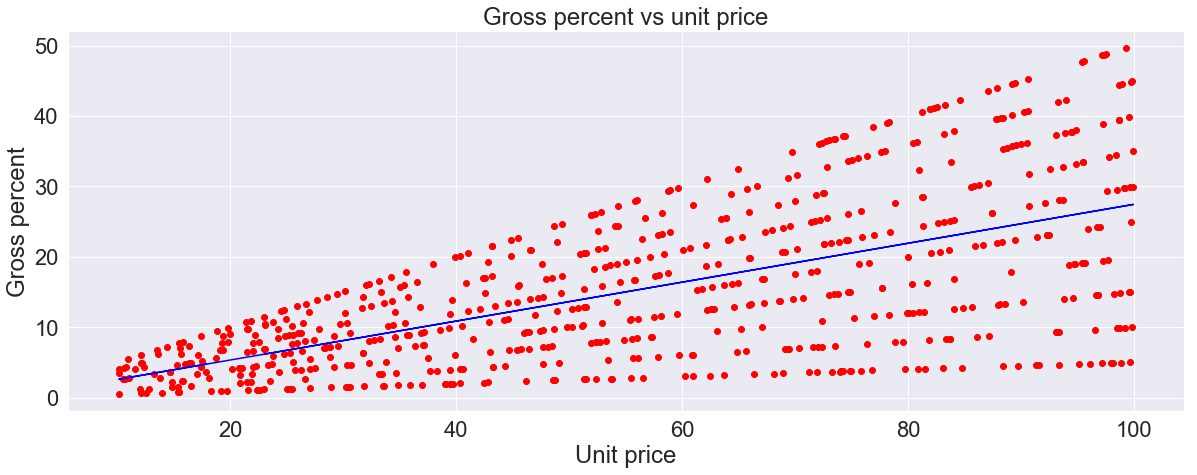

In [78]:
#Plotting the Training model
plt.figure(figsize=(20,7))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue') 
plt.title('Gross percent vs unit price')
plt.xlabel('Unit price')
plt.ylabel('Gross percent')
plt.show()

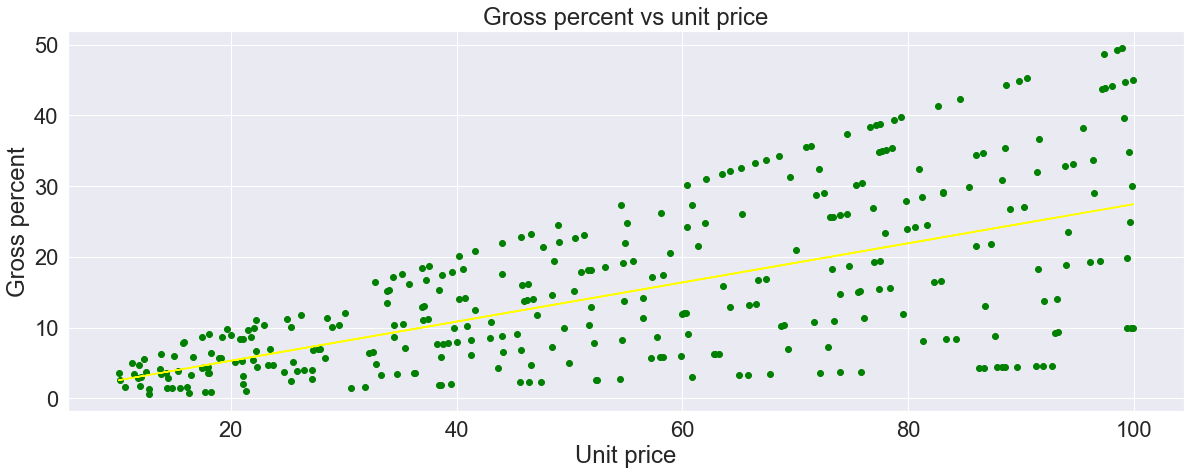

In [81]:
#Plotting the Testing model
plt.figure(figsize=(20,7))
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, regressor.predict(X_test), color = 'yellow')
plt.title('Gross percent vs unit price')
plt.xlabel('Unit price')
plt.ylabel('Gross percent')
plt.show()

In [95]:
#Obtaining the co-efficients of the simple regression model
regressor.coef_, regressor.intercept_ 

(array([0.27162136]), 0.30626506841186085)

In [93]:
# Obtaining the Predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
0,24.9510,22.897014
1,29.3800,16.266736
2,19.4635,15.411129
3,6.4455,11.977835
4,2.1870,6.246624
5,29.4750,16.318344
6,6.0870,16.839857
7,34.8425,27.346172
8,21.4335,13.243590
9,6.5775,7.452623


In [94]:
# Model Evaluation- Obtaining the Mean Absolute Error to measure the regression accuracy
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 6.985295389587117


From the above linear regression graphs, we can see that as the unit price increases, the gross percent spreads on both sides of the line, i.e the rate of variance of gross percent increases with unit price. So projecting graphs further, we can determine an unit price in accordance with the variance

##### CLUSTERING

In [64]:
X = salesdf.iloc[:, -4].values.reshape(-1,1) #Selecting the feature 'Cost of Goods Sold' feature 

To determine the optimal number of clusters ,we use the Elbow method.  

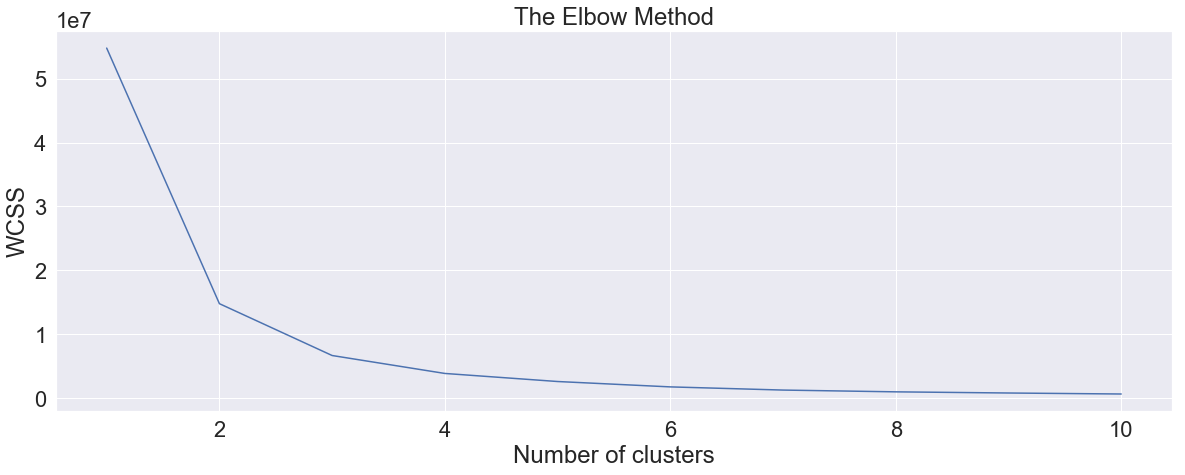

In [65]:
#Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,7))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [100]:
# Now, we train the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

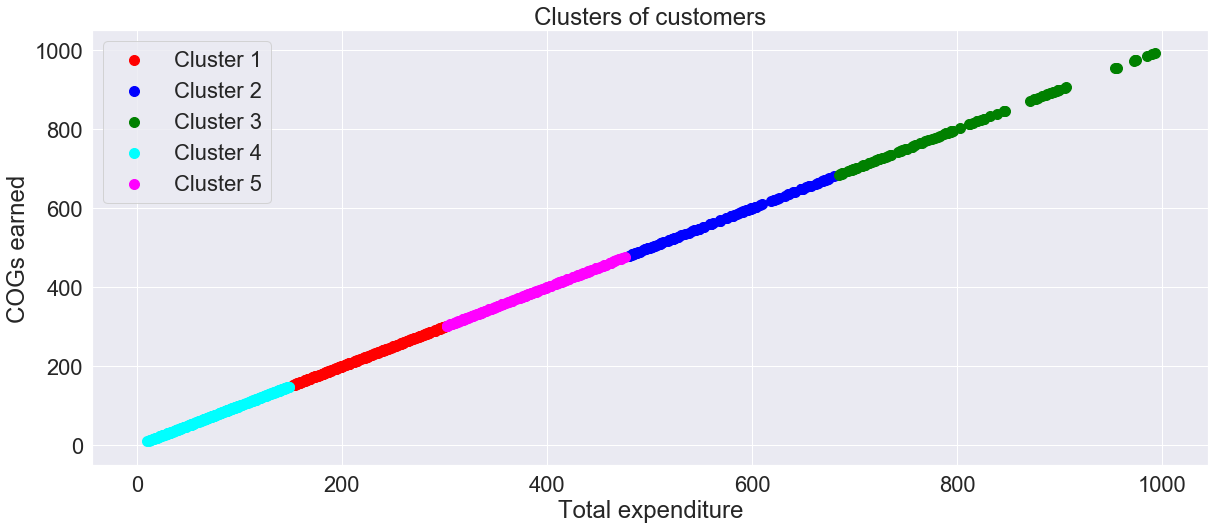

In [101]:
plt.figure(figsize=(20,8))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Total expenditure')
plt.ylabel('COGs earned')
plt.legend()
plt.show()

The cluster denotes customers of different economic backgrounds in the shop. In this case, the cluster is in the form of a line beacuse as the expenditure group increases, COGs value also increases linearly. Precisely saying, red coloured cluster represents economically lower class of customers and blue cluster represents economically stronger group of customers

### REPORT

**NOTE: If the data had consisted of  more months and years, we could have examined how the increase in number of customers across the years and the increment in the total goods bought as a result would affect the 'Gross Income'. That way, the insights and inference procured here could be validated more.**

* <font color='blue'>The male customers generate more gross income per item while buying items at lower quantity whereas female customers generate more gross income per item while buying at higher quantities.</font> 



* <font color='blue'>The highest demand in Branch 'A' is for 'Home and lifestyle', it is 'Sports and travel' in Branch 'B' and 'Food and beverages' has the highest demand in Branch 'C'.</font> 


* <font color='blue'>Male customers give higher ratings than the female customers when 'Ewallet' or 'Credit card' is used as the payment method, whereas when the payment is done through 'Cash', female customers rate higher than male customers.</font> 


* <font color='blue'>'Health and income' product line has more gross income when nearing the weekend- from Thursday to Sunday, 'Electronic accessories' on Tuesdays and Wednesdays,'Home and lifestyle' on Sundays,'Sports and Travel' on Fridays,'Food and beverages' and 'fashion accessories items' has more gross income on Mondays.</font> 


* <font color='blue'>Branch C of the stores contributes the most to gross income of the supermarket.</font> 


* <font color='blue'>Female customers seem to contribute more to the gross income of the market when compared to Male customers.</font> 


* <font color='blue'>Though the 'Gross Income' fluctuates throughout the month,  the general trend decreases in 'Gross income'.</font> 


* <font color='blue'>There exists no relationship between the 'Unit Price' and 'Quantity' purchased.</font> 


* <font color='blue'>The customers who have membership have contributed more to the Gross income when compared to 'Normal' customers. However, the difference between the contribution is insignificant.</font> </font> 


* <font color='blue'>Even though the number of customers in 'Naypyitaw' is less, they tend not only to spend more on each purchase, but also buy more in quantity making 'Naypyitaw' , a good choice for business expansion.</font> 